# Predicting housing prices in Poland 

The aim of this project is to create an ensemble machine learning model, which aim will be to predict, as closely as possible, the prices of housing in Poland. The dataset was scrapped personally from Otodom.pl site, where both real estate agencies and single owners have the possibility to list their house, apartment and so forth on sale or to rent. This project focuses only on the sale department. Each observation is a separate offer of sale in Polish Złoty (PLN).

First step will be the preprocessing of the data as well as data description. Next, will be some simple exploratory data analysis to get the grasp of the dataset, some statistics or distributions concerning the variables. Later, I will create a simple model, which will be treated as a basic benchmark to the final model. Then, three models will be fitted and their prediction accuracy compared against the benchmark. Those three will be finally assembled into on final model. After the assembly of the final model, the prediction quality against the bench and separate models will be assessed.

# Dataset

Since the data I have gathered is in a raw state, partially in Polish, there is need for some preprocessing, which will be conducted after initial description of the data. The data was scrapped from the "for sale" section of Otodom.pl. It was done in September 2020. Poland, as most of the world, was amidst COVID-19 pandemic, thus it is a quite rare occasion to have a real estate data from such uncommon and uncertain times.

First step is, of course, loading and looking at the data to see what alterations does it need, what needs to be removed or changed. For now, none of the variables is suitable for analysis and modeling, as we can clearly see from the first 5 rows. The initial size of the set is 12 229 observations and 20 variables.

In [32]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
# Loading the data
offers = pd.read_excel(os.getcwd() + '\\otodom_offers.xlsx')

In [33]:
display(offers.head())
display(offers.shape)

,alink,balcony,basement,build_floors,build_material,build_type,condition,district,elevator,floor,garage,heating,market,no_rooms,offer_type,own_form,price,sq_metre,windows,year_constr
0,https://www.otodom.pl/oferta/mieszkanie-120m-b...,NaN,piwnica,3.000,cegła,apartamentowiec,do zamieszkania,Bemowo,NaN,2,NaN,kotłownia,wtórny,5,Oferta prywatna,pełna własność,"1 260 000 zł,",120 m²,drewniane,1996.000
1,https://www.otodom.pl/oferta/apartament-71-m2-...,NaN,piwnica,8.000,cegła,blok,do zamieszkania,Mokotów,winda,7,garaż/miejsce parkingowe,miejskie,wtórny,3,Oferta prywatna,pełna własność,"879 000 zł,",71 m²,plastikowe,2008.000
2,https://www.otodom.pl/oferta/apartament-z-tara...,NaN,piwnica,5.000,NaN,apartamentowiec,do wykończenia,Mokotów,winda,1,garaż/miejsce parkingowe,miejskie,pierwotny,4,Oferta biura nieruchomości,pełna własność,"1 790 000 zł,","119,53 m²",NaN,2019.000
3,https://www.otodom.pl/oferta/bielany-perzynski...,balkon,piwnica,3.000,pustak,blok,do zamieszkania,Bielany,NaN,parter,NaN,miejskie,wtórny,3,Oferta prywatna,spółdzielcze własnościowe,"635 000 zł,",57 m²,plastikowe,1963.000
4,https://www.otodom.pl/oferta/nowy-apartament-w...,balkon,NaN,3.000,NaN,blok,do wykończenia,Białołęka,winda,2,garaż/miejsce parkingowe,NaN,pierwotny,3,Oferta dewelopera,NaN,Zapytaj o cenę,"55,59 m²",None,NaN


(12229, 20)

## Variables

Of the 20 variables the first one was used purely for scrapping reasons, so will not be used and explained. Some of the variables are pretty self-explanatory, however, just to make sure I will explain each one briefly. The values 0 and 1 stand for lack or presence of certain amenity, which are for now represented as "NaN" and "amenity" in the dataset, but will be changed to 0s and 1s later on. Two variables have many nominal values (*build_material* and *district*) and since this project's aim is to create prediction models, I decided not to delve deep into exploratory data analysis and visualization of those many levels. The full list of variables:
* balcony 
  * 0 - no balcony, 1 - otherwise
* basement 
  * 0 - no basement, 1 - otherwise
* build_floors 
  * total number of floors in the building
* build_material 
  * characterizes main building material (bricks, airbricks and 8 others)
* build_type 
  * block of flats
  * apartment building
  * tenement house
  * detached house
  * terraced house
  * infill
  * loft
* condition 
  * ready to move
  * for interior finishing
  * fixer-upper 
* district 
  * denotes a certain district in Warsaw (Bemowo, Mokotów and 23 others)
* elevator 
  * 0 - no elevator, 1 - otherwise
* floor 
  * floor at which the apartment is located
* garage 
  * 0 - no garage/parking space, 1 - otherwise
* heating 
  * district
  * gas
  * boiler room
  * electric
  * other
* market 
  * 0 - primary market, 1 - secondary market
* no_rooms 
  * number of rooms
* offer_type 
  * agency offer
  * private offer 
  * developer offer
* own_form
  * full ownership
  * co-operative ownership
  * co-operative ownership with mortgage registers 
  * shares
* **price** 
  * sales price in PLN
* sq_metre 
  * the area of the apartment/house in square metres
* windows 
  * plastic
  * wooden
  * aluminium
* year_constr 
  * year of construction of the building

## Preprocessing

First thing in the preprocessing part will be removing the link column, which served purpose only during the scrapping process and is now completely useless.

In [34]:
offers = offers.drop('alink', axis = 1)

Next task is to recode the variables to have them ready as input for the models in next chapters of this project. The variables in this dataset are divided into binary, nominal and continuous types. Each of the types will be taken care of separately below. We start with binary variables. In the dataset we have an example of balcony, which has two values: "NaN" and "balkon" (Polish for "balcony"), where "NaN" specifies lack of balcony. The pattern applies to the other binary variables as well. The aim is to recode lack of amenities to zeros and ones in case of presence.

In [35]:
binary_vars = ['balcony', 'basement', 'elevator', 'garage', 'market']
offers[binary_vars] = offers[binary_vars].replace(np.nan, 0)

# One observation doesn't have specified market, so we will remove it
offers = offers[offers['market'] != 0]
offers[binary_vars] = pd.get_dummies(offers[binary_vars], drop_first=True)

The nominal variables are representing factors, which cannot be ranked (or rather cannot be ordered in an obvious way - like type of building). However, for now at least, those variables will be encoded as integers in a range (i.e. districts will be numbered from 0 to 24). Later on, one-hot encoding will be done on the variables to ensure that the information is not lost in the model and each nominal level has its own variable (this is due to the fact that one cannot say that "Bielany" is twice "Mokotów", if they were valued 2 and 1). 

At first, I will also get rid of 303 observations, which don't have specified floor, because it is one of the most basic things when looking for an apartment. Such offer is potentially a poorly created one or suspicious other way. The build_floors variable describes the total number of floors that the building has. I will replace the missing values there with the floor number of the offered apartment, so that the floor matches build_floor. It can possibly bias the results, since top floor may be more attractive, than not-top floor, however I did not want to lose 687 records. It is not however entirely unreasonable since a building with an offer at specified floor has to have at least the amount of floors the offer specifies for the apartment.

In [36]:
nominal_vars = ['build_material', 'build_type', 'condition', 'district',
                'heating', 'offer_type', 'own_form', 'windows']
offers[nominal_vars] = offers[nominal_vars].astype('category')
nom_columns = offers.select_dtypes(['category']).columns
offers[nom_columns] = offers[nom_columns].apply(lambda x: x.cat.codes)

# Changing "parter" to 0 as in ground-floor level
offers['floor'] = offers['floor'].apply(lambda x: 0 if x == 'parter' else x)
display(offers.floor.isna().sum())  # 303 missing floor values
offers = offers[offers['floor'].notna()]
display(offers.build_floors.isna().sum())  # 687 missing building floors values
offers['build_floors'] = offers['build_floors'].fillna(offers['floor'])
# 0 missing building floors values after imputation
display(offers.build_floors.isna().sum())

303

687

0

There is also one more problem arising in the floors variables, namely that both 'floor' and 'build_floors' have some not-numeric values among them. Shown below:

In [37]:
display((offers['floor'] == "> 10").sum())
display((offers['build_floors'] == "> 10").sum())
display("************")
display(offers.floor.value_counts())
display("************")
display(offers.build_floors.value_counts())

354

41

'************'

1           2325
2           1943
3           1744
0           1637
4           1368
5            831
6            560
7            410
> 10         354
8            292
9            237
10           219
poddasze       4
suterena       1
Name: floor, dtype: int64

'************'

4.0     2439
3.0     1655
5.0     1445
10.0    1111
6.0     1030
2.0      863
7.0      851
8.0      787
9.0      318
12.0     245
11.0     218
1.0      211
15.0     147
0        111
26.0      88
16.0      67
13.0      65
14.0      53
> 10      41
17.0      32
25.0      22
30.0      19
22.0      17
27.0      17
52.0      17
44.0      12
24.0      11
20.0      10
23.0       7
19.0       5
18.0       4
28.0       3
21.0       2
45.0       1
55.0       1
Name: build_floors, dtype: int64

Since there are quite few values among 'build_floors' that have values higher than 10, for example, 14, 16 or even 55, but no such values in the 'floor column', I decided to classify each offer above the 10th floor as a 11th floor (a value containing all floors above 10th). It is a simplification of sorts, but one that does not affect the majority of observations.

In [38]:
# Setting "suterena" ("basement") as ground-level
offers['floor'] = offers['floor'].apply(
    lambda x: 11 if x == '> 10' else (0 if x == "suterena" else x))
# Setting the "poddasze" ("attic") value to top floor value of that building
offers['floor'][offers['floor'] ==
                "poddasze"] = offers['build_floors'][offers['floor'] == "poddasze"]

# Chnaging to numeric
offers['build_floors'] = offers['build_floors'].apply(
    lambda x: 11 if x == '> 10' else x)
pd.to_numeric(offers['floor'])
pd.to_numeric(offers['build_floors'])

# Setting all above 10th floor to value 11
offers['floor'] = offers['floor'].apply(lambda x: 11 if x > 10 else x)
offers['build_floors'] = offers['build_floors'].apply(
    lambda x: 11 if x > 10 else x)

Also, due to the fact that cat.codes function encodes not specified values as -1, I will add 1 to the each column, which was in the nom_columns list in order to receive <0,highest value> ranges instead of <-1, highest value-1> ranges.

In [39]:
offers[nom_columns] = offers[nom_columns] + 1

Next thing on the to-do list is to clean the price and square metre columns in order to classify them later as numerical variables instead of character strings. To do so I created a function, which removes the last part of the string, namely "zł," and "m²". After cleaning, I also swapped "," with ".", since the decimal point differs between Polish and American system.

In [40]:
def clean_numbers(string):
    """Remove the character part of the string"""
    parts = string.split()
    parts.pop()
    number = "".join(parts)
    return number


offers['price'] = offers['price'].apply(lambda x: clean_numbers(x))
offers['price'] = offers['price'].apply(lambda x: x.replace(',', '.'))

offers['sq_metre'] = offers['sq_metre'].apply(lambda x: clean_numbers(x))
offers['sq_metre'] = offers['sq_metre'].apply(lambda x: x.replace(',', '.'))

Below are shown the first five rows, which now look cleaner, but still not ready to be properly investigated.

In [41]:
display(offers.head())

,balcony,basement,build_floors,build_material,build_type,condition,district,elevator,floor,garage,heating,market,no_rooms,offer_type,own_form,price,sq_metre,windows,year_constr
0,0,1,3.000,3,1,3,1,0,2.000,0,4,1,5,3,1,1260000,120,2,1996.000
1,0,1,8.000,3,2,3,6,1,7.000,1,5,1,3,3,1,879000,71,3,2008.000
2,0,1,5.000,0,1,2,6,1,1.000,1,5,0,4,1,1,1790000,119.53,0,2019.000
3,1,1,3.000,7,2,3,3,0,0.000,0,5,1,3,3,3,635000,57,3,1963.000
4,1,0,3.000,0,2,2,2,1,2.000,1,0,0,3,2,0,Zapytajo,55.59,0,NaN


The remaining problem is the "Zapytaj o" value in price column. It means that the price was not specified on the website at the time and that the owner of the post should be inquired about it. Since we have no way of knowing the price, which is the target variable in this project, we will remove the observations containing missing price. It would be interesting to use the variables and models later on to predict the prices for those observations and then obtain knowledge from the seller how well or how poorly the model predicted the price. That's just food for thought though.

In [42]:
# There are 384 such observations
display(len(offers[offers['price'] == "Zapytajo"]))
offers = offers[offers['price'] != "Zapytajo"]

384

Two values of number of rooms column need changing since they are not a numerical value. Since, as we see below, then number of rooms does not exceed 10 (apart from those 2 values - they state "more than 10"), I decided to set the number of those rooms to 11, which is not far off the rest of the distribution and fulfills the "more than 10" criterion.

In [43]:
offers['no_rooms'].value_counts()

2                4233
3                4212
4                1453
1                1170
5                 375
6                  77
7                  16
9                   2
więcej niż 10       2
8                   1
Name: no_rooms, dtype: int64

In [44]:
offers['no_rooms'] = offers['no_rooms'].apply(
    lambda x: 11 if type(x) != int else x)
offers['no_rooms'].value_counts()

2     4233
3     4212
4     1453
1     1170
5      375
6       77
7       16
9        2
11       2
8        1
Name: no_rooms, dtype: int64

Now we can apply the to_numeric function, which changes objects into floats. Our dataset has four values needing that transformation. Having done that, we can calculate some descriptive statistics to get a grasp of the data, how it is distributed, and what are the tendencies.

In [45]:
numerical_vars = ['no_rooms', 'price', 'sq_metre', 'year_constr']
offers[numerical_vars] = offers[numerical_vars].apply(pd.to_numeric)

In [46]:
offers.describe()

,balcony,basement,build_floors,build_material,build_type,condition,district,elevator,floor,garage,heating,market,no_rooms,offer_type,own_form,price,sq_metre,windows,year_constr
count,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,11541.000,10087.000
mean,0.598,0.285,5.802,2.575,1.627,1.824,11.985,0.631,3.193,0.501,3.181,0.749,2.650,1.252,0.952,754283.049,62.622,1.484,1997.775
std,0.490,0.451,2.900,2.894,1.157,1.242,7.676,0.483,2.786,0.500,2.333,0.433,1.004,0.656,0.811,641968.079,31.977,1.419,262.574
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,40000.000,11.000,0.000,60.000
25%,0.000,0.000,4.000,0.000,1.000,0.000,6.000,0.000,1.000,0.000,0.000,0.000,2.000,1.000,0.000,460000.000,43.000,0.000,1975.000
50%,1.000,0.000,5.000,3.000,2.000,2.000,10.000,1.000,3.000,1.000,5.000,1.000,3.000,1.000,1.000,591527.000,55.350,2.000,2007.000
75%,1.000,1.000,8.000,5.000,2.000,3.000,20.000,1.000,4.000,1.000,5.000,1.000,3.000,1.000,1.000,800000.000,72.540,3.000,2020.000
max,1.000,1.000,11.000,10.000,7.000,3.000,24.000,1.000,11.000,1.000,5.000,1.000,11.000,3.000,4.000,15000000.000,530.000,3.000,20202.000


However, there are two more issues that occurs in the *year of construction* column. First of all, there are 18 offers with abnormally early or late years of construction, which are probably the result of human errors while submitting the offer on the page. However, they could potentially bias the model so we will remove them from the set. 

The other problem is caused by quite few (1454) missing values in that column, which will be imputed with the median value for year of construction (2007). Although, it is quite a big generalisation, I do not think that this variable has a particular impact compared to some others (old tenement house can easily be much more expensive than freshly built block of flats). 

In [47]:
display(offers[(offers["year_constr"] > 2022)
               | (offers["year_constr"] < 1800)])
display(offers["year_constr"].isna().sum())

,balcony,basement,build_floors,build_material,build_type,condition,district,elevator,floor,garage,heating,market,no_rooms,offer_type,own_form,price,sq_metre,windows,year_constr
123,1,1,3.000,0,2,3,20,0,2.000,1,5,1,4,1,2,560000.000,62.000,0,60.000
1031,0,0,7.000,5,1,3,16,0,7.000,1,5,1,3,1,1,949500.000,71.000,3,20156.000
1680,1,0,2.000,3,4,3,9,0,0.000,0,5,1,4,3,1,579000.000,61.500,3,1548.000
1776,0,1,2.000,3,4,3,23,0,2.000,0,5,1,2,3,1,485000.000,25.500,3,1780.000
3198,1,1,10.000,0,2,3,24,1,9.000,0,0,1,4,1,2,815000.000,74.000,0,70.000
5283,0,1,3.000,9,2,1,16,0,0.000,0,5,1,3,1,3,656200.000,77.200,3,83.000
6253,0,0,6.000,0,0,0,23,0,5.000,0,0,1,3,1,0,819000.000,58.500,0,976.000
6901,1,0,3.000,5,2,2,2,1,2.000,1,5,0,4,1,1,572000.000,70.360,3,2029.000
7229,0,1,2.000,3,4,2,23,0,0.000,0,0,1,2,1,1,990000.000,64.000,3,1780.000
7862,1,1,3.000,0,2,0,18,0,2.000,0,0,1,3,1,1,455000.000,58.800,3,80.000


1454

In [48]:
offers['year_constr'].fillna(offers['year_constr'].median(), inplace=True)

In [49]:
offers = offers[(offers["year_constr"] <= 2022) &
                (offers["year_constr"] >= 1800)]

In [50]:
offers.shape

(11523, 19)

Of the initial 12 229 observations we are left with 11 523, from which most were removed due to low numbers of invalid data for each specific column. Some other missing values were imputed, as they had more incomplete observations and losing them would significantly reduce the size of the dataset. Of course one could try filling all the missing values with predicted ones, but whether it would improve the results is questionable (not many were removed, thus not much of an impact probably). The two imputed variables was the number of floors in the building, filling with the smallest reasonable number and the year of construction, which was filled, arbitrarily, by the median (year 2007). The number of variables remained the same, since, for now, the nominal variables were not one-hot encoded.

## Basic exploratory data anaylsis

Below I will present some descriptive statistics and visualizations to represent the dataset and see what kind of characteristics the variables possess. The reason for this is to see whether some observations need to be removed, despite best efforts not to remove to many in the previous chapter. First let's start with the target variable: **price**.

In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
offers.price.describe()

count      11523.000
mean      754458.808
std       642392.726
min        40000.000
25%       460000.000
50%       591700.000
75%       800000.000
max     15000000.000
Name: price, dtype: float64

It is clear and obvious that half of the offers are beneath the price of ~600k PLN, but the mean is around 750k PLN, which means that there are quite a few big outliers. We can also see that the max price is equal to 15 million PLN, which is significantly skewing the distribution. The boxplot below shows the distribution of the price values and it seems to convince us further that there are numerous outliers in the data. 75% of the observations are below the 800k threshold, while the remaining 25% seem to ramp up the price substantially. 

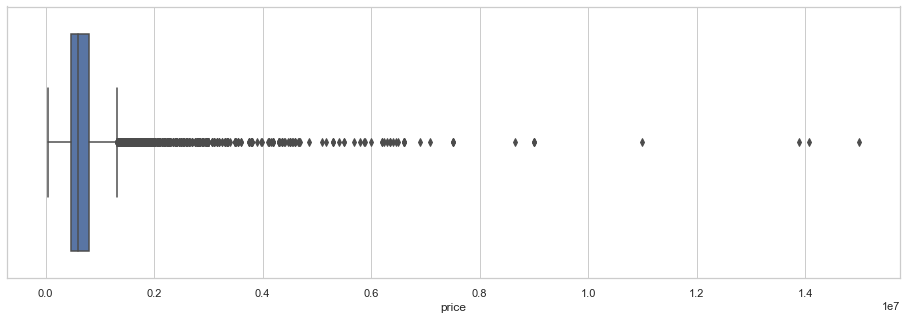

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [16, 5]

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=offers["price"])

Since outliers tend to have big impact on predicting continuous variables, I decided to stick to the vast majority of the observations that are in the range of <0,1 million>. Below we can see the boxplot of prices of 1 million or less PLN and that threshold removes the outliers while still leaving almost 10 thousand observations. There is only one outlying value, but it is relatively close to the left whisker of the boxplot. Since we have enough observations remaining and the outliers can significantly bias the models, the input data for them will contain just offers, which price does not exceed 1 million. The removal of the outliers proved to significantly decrease the mean absolute errors of each of the models, reducing the spread by 10, or even 20, thousand PLN (part of the testing process, not included in this project).

(9753, 19)


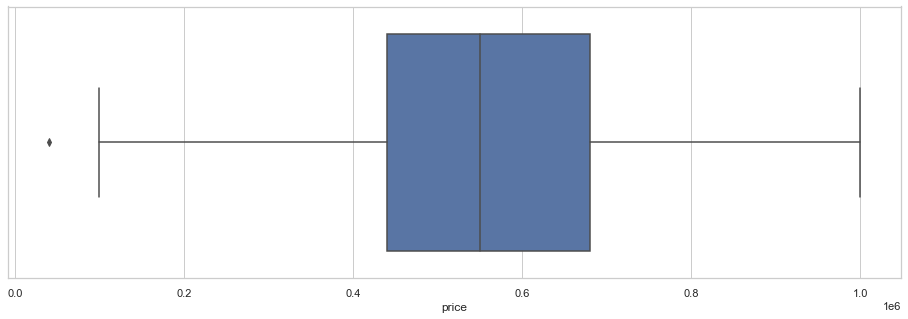

In [53]:
offers = offers[offers["price"] <= 1000000]

print(offers.shape)

plt.rcParams['figure.figsize'] = [16, 5]

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=offers["price"])

Below, shown is a table containing descriptive statistics for other variables that can be considered as continuous, or at least numerical. We can see that 50% of apartments are located on the 2nd or lower floor (value 0 is 1st floor or "parter" - our second floor is third floor in USA), while only 25% being higher than 5th floor. The buildings, in which the apartment is located, are usually around 5 stories tall. 75% of the houses have 3 or less rooms and 63 or less square metres. Half of the houses were built pre-2007 and some of them are much older than others leading to the mean being equal to the year 1997.

Basing on the means, the most average offer on the site would be a 6-story tall building built in 1997, located on the 3rd floor, having 2 and a half rooms (does not make sense, but it is only for the sake of averaging) and 53 square metres.

In [54]:
numerical_vars = ['floor', 'build_floors', 'no_rooms', 'sq_metre', 'year_constr']
offers[numerical_vars].describe()

,floor,build_floors,no_rooms,sq_metre,year_constr
count,9753.000,9753.000,9753.000,9753.000,9753.000
mean,3.103,5.824,2.455,53.605,1997.188
std,2.722,2.904,0.873,18.497,25.053
min,0.000,0.000,1.000,11.000,1850.000
25%,1.000,4.000,2.000,40.200,1976.000
50%,2.000,5.000,2.000,52.000,2007.000
75%,4.000,8.000,3.000,63.000,2019.000
max,11.000,11.000,11.000,247.000,2022.000


Below we can see the fractions representing how often does certain amenity occur among the offers. We can observe that most offers come with a balcony, in a building with elevator and roughly half have a garage/parking space available. Slightly more than 1/4 of the offers additionally have a basement. Almost 75% of the offers is of "used" apartments and houses and are sold on the secondary market.

In [55]:
print("Fraction of offers with balcony: {} \n".format(round(np.mean(offers.balcony),3))) 
print("Fraction of offers with basement: {} \n".format(round(np.mean(offers.basement),3))) 
print("Fraction of offers with elevator: {} \n".format(round(np.mean(offers.elevator),3))) 
print("Fraction of offers with garage: {} \n".format(round(np.mean(offers.garage),3))) 
print("Fraction of offers on secondary market: {} \n".format(round(np.mean(offers.market),3))) 

Fraction of offers with balcony: 0.604 

Fraction of offers with basement: 0.294 

Fraction of offers with elevator: 0.617 

Fraction of offers with garage: 0.47 

Fraction of offers on secondary market: 0.743 



Below we can see the plots showing the distributions of the nominal values. Since there are many different values, I won't be describing each and every one of them as it would be time-consuming and not essential to the project. The insight that we can gather from most of the plots is that all variables (apart from *Condition*) have severe under-representations in some of their categories. That can be partially because of human error - not knowing, which category to choose while creating an offer and thus creating a separate one. Other explanation is simply that there are some observations (houses/apartments) with rare, one of a kind features or possibly due to them being old, designed to order and so forth. Districts being underrepresented stems from the fact that some of the 25 values are probably just sub-districs of a larger one and some people do not specify that in their offers. As far as windows and heating is concerned, the differences in distribution of values is most probably due to the fact that newer solutions supersede the old solutions (like plastic windows superseded wooden ones).

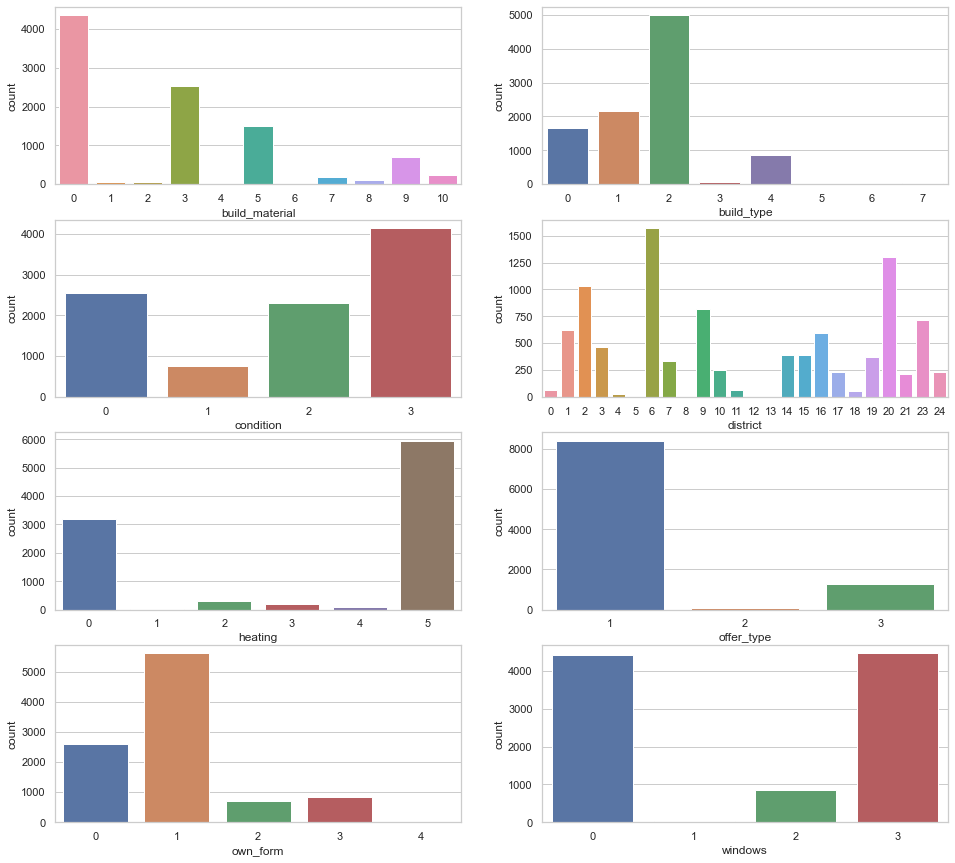

In [56]:
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.rcParams['figure.figsize'] = [16, 15]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2)
sns.countplot(x="build_material", data=offers, ax=ax1)
sns.countplot(x="build_type", data=offers, ax=ax2)
sns.countplot(x="condition", data=offers, ax=ax3)
sns.countplot(x="district", data=offers, ax=ax4)
sns.countplot(x="heating", data=offers, ax=ax5)
sns.countplot(x="offer_type", data=offers, ax=ax6)
sns.countplot(x="own_form", data=offers, ax=ax7)
sns.countplot(x="windows", data=offers, ax=ax8)
fig.show()

# Modeling

The first step in the modeling process will be creating the benchmark model. In this study, I decided to use a simple Decision Tree Regressor as a basic model for predicting the price. The amount of tuning of this model will be small, since its main purpose is to show the difference in quality of prediction between a relatively "vanilla" model and an ensemble model with hyperparameter tuning. 



In order to improve the quality of predictions the data is now one-hot encoded (nominal variables) and standardized (numerical variables). The final data that will be input into the models contains of 9753 observations and 95 variables (great increase due to binarization). Such solution proves to increase the accuracy of each of the models, as the nominal variables are now not forming dependencies like mentioned before (district being "worth" twice the other district).

In [57]:
dummies = offers[["build_material", "build_type", "condition", "district", "heating", 
                  "offer_type", "own_form", "windows", "floor", "build_floors", "no_rooms"]].astype(object)
dummies = pd.get_dummies(dummies, drop_first = True)
numerical = offers[["sq_metre", "year_constr"]].apply(lambda x: (x-x.mean())/x.std())

offers_ready = pd.concat([offers[["balcony", "basement", "elevator", "garage", "market", "price"]], numerical, dummies], axis=1)

offers_ready.shape

(9753, 95)

## Benchmark Model - Decision Tree Regressor

The Decision Tree Regressor will have two parameters optimized using GridSearchCV: max depth of the tree and minimum samples to be at a leaf node. It will be done along the 5-fold cross validation on the training set (which is 70% of the entire dataset) to find the parameter yielding the best results. Then the model yielding best results will predict on the set on which it was trained to see whether overfitting is occurring. Also, random state is specified to receive constant results.

As we can see from the output, the optimal depth is 14 and min_samples_leaf is 10. It results in prices being predicted, on average, wrongly by roughly 62k PLN (Mean Absolute Error). When considering the more expensive apartments (with prices nearing the price of million) it does not seem to be that big of a mismatch, however, for most potential buyers it is a significant amount of money, which could make or break the deal. In order to improve the predictions, other models will be created and then compared to this benchmark model.

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

X = offers_ready.drop('price', axis = 1)
y = offers_ready.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

param_grid_dt = {'max_depth': np.arange(5, 16, 1), 'min_samples_leaf': np.arange(5,16,1)}

dt = DecisionTreeRegressor(random_state=2021)
dt_cv = GridSearchCV(dt, param_grid_dt, cv=5)

dt_cv.fit(X_train, y_train)

# TEST
y_pred_bench = dt_cv.predict(X_test)

MAE_bench = mean_absolute_error(y_test, y_pred_bench)
print("Tuned parameters: {} \n".format(dt_cv.best_params_))
print("Mean absolute error TEST: %.3f" % MAE_bench)

# TRAIN
y_pred = dt_cv.predict(X_train)

MAE = mean_absolute_error(y_train, y_pred)
print("Mean absolute error TRAIN: %.3f" % MAE)

Tuned parameters: {'max_depth': 14, 'min_samples_leaf': 10} 

Mean absolute error TEST: 62044.813
Mean absolute error TRAIN: 49453.619


Calculations above show the MAE for train set and we can see that same model (with max_depth=14 and min_samples_leaf=10) has significantly lower error than for the test set (difference of 12k). Decision Trees are prone to overfitting and this case is a very good example of such behaviour. Since it is only a benchmark model, I will leave the overfitting as it is and try to make the ensemble model without overfitting to show it as an another advantage over the bench.

## Main model

The final model will be an ensemble model composed of three separate models:
  
    1. Random Forest
    2. Gradient Boosting
    3. Neural Network
    
Each of the models will be created and tuned individually and then supplied into the final VotingRegressor model, which averages the predictions of supplied Regressor models with accordance to specified weights. A simple visual representation of the architecture of the final model is shown below:   
  
<img src="graph2.png">

### Random Forest

We begin with Random Forest (a bagging algorithm) and perform a grid search along the optimal number of trees in the forest and min_samples_leaf. The ranges of parameter grid in all models were previously narrowed down by testing. Again, 3-fold cross-validation is conducted simultaneously. The max_depth of tree was adapted to smaller value than in the decision tree as with its increase the model tended to overfit substantially. The optimal number of trees from the range provided is 1350 and min_samples_leaf is 2. For that values of hyperparameters we can see that we have a very small improvement from the previous model. However, we now have much more similar train set MAE, so it seems that the overfitting problem is smaller.

In [59]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {'n_estimators': [1300, 1350, 1400], 'min_samples_leaf':[1,2,3]}

rf = RandomForestRegressor(random_state=2021, max_depth=8, n_jobs=-1)
rf_cv = GridSearchCV(rf, param_grid_rf, cv=3)

rf_cv.fit(X_train, y_train)

# TEST
y_pred_rf = rf_cv.predict(X_test)

MAE_rf = mean_absolute_error(y_test, y_pred_rf)
print("Tuned parameter: {} \n".format(rf_cv.best_params_))
print("Mean absolute error TEST: %.3f" % MAE_rf)

# TRAIN
y_pred = rf_cv.predict(X_train)

MAE = mean_absolute_error(y_train, y_pred)
print("Mean absolute error TRAIN: %.3f" % MAE)

Tuned parameter: {'min_samples_leaf': 2, 'n_estimators': 1350} 

Mean absolute error TEST: 61875.987
Mean absolute error TRAIN: 55664.681


### Gradient Boosting

Next model used in the project is a Gradient Boosting Regressor. Hyperparameters tuned using GridSearchCV include number of estimators and learning rate. Min_samples_leaf was set to 0.5 and max_depth was set to just 2 in order to reduce overfitting. Also, the max number of features parameter was set to square root as it significantly increased computational time without decreasing quality of predictions. Best result is yielded for the combination of 4000 estimators and 0.4 learning rate and the error is now significantly smaller (50k). However, it seems that in this case the overfitting to the data is still present to some extent. Predictions on train set have an MAE of almost 45k, while on test set equal to 50k. While the error on the test set is significantly smaller than for previous models and gradient boosting is outperforming them, it is wise to keep in mind that it is overfitting the data. Testing smaller values of estimators led to smaller overfitting, but also significantly worse prediction errors.

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid_gb = {'n_estimators': [3000, 3500, 4000], 
                 'learning_rate': [0.15, 0.3, 0.4, 0.5]}

gb = GradientBoostingRegressor(min_samples_split=0.5, max_depth=2, 
                               max_features = "sqrt", random_state=2021)
gb_cv = GridSearchCV(gb, param_grid_gb, cv=3)

gb_cv.fit(X_train, y_train)

# TEST
y_pred_gb = gb_cv.predict(X_test)

MAE_gb = mean_absolute_error(y_test, y_pred_gb)
print("Tuned parameters: {} \n".format(gb_cv.best_params_))
print("Mean absolute error TEST: %.3f" % MAE_gb)

# TRAIN
y_pred = gb_cv.predict(X_train)

MAE = mean_absolute_error(y_train, y_pred)
print("Mean absolute error TRAIN: %.3f" % MAE)

Tuned parameters: {'learning_rate': 0.4, 'n_estimators': 4000} 

Mean absolute error TEST: 50723.115
Mean absolute error TRAIN: 44829.160


### Neural Network

The last of the component models is the Neural Network. The number of observations may be insufficient to get the best of neural network, however it was interesting to see the results of this approach. The architecture of the neural network below is a result of trial-and-error of changing layers, number of neurons in a layer as well as activation functions, epochs and so forth. After 65 epochs the neural network started to overfit the data. The final neural network is defined in a function *build_network*, since it is needed later on in a sklearn wrapper. Resulting MAE is bigger than for the gradient boosting algorithm and closer to the random forest one, but as an advantage, this neural network does not overfit (MAE for test and train sets are roughly the same - around 55k/56k). Higher number of epochs led to overfitting, while adding more layers increased error.

In [67]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout

def build_network():
    
    nn = Sequential()

    nn.add(Dense(400, input_dim=94, activation='relu'))
    nn.add(Dropout(0.5))
    nn.add(Dense(200))
    nn.add(Dropout(0.4))
    nn.add(Dense(50,  activation='relu'))
    nn.add(Dense(1,  activation='relu'))

    nn.compile(optimizer = 'adam', loss = "mean_absolute_error")
    return nn
    

nn = build_network()
nn.fit(X_train, y_train, epochs=65, batch_size=5, verbose=0)

# TEST
y_pred_nn = nn.predict(X_test)

MAE_nn = mean_absolute_error(y_test, y_pred_nn)
print("Mean absolute error TEST: %.3f" % MAE_nn)

# TRAIN
y_pred = nn.predict(X_train)

MAE = mean_absolute_error(y_train, y_pred)
print("Mean absolute error TRAIN: %.3f" % MAE)

Mean absolute error TEST: 56355.359
Mean absolute error TRAIN: 54266.541


### Final Model


The final model is an averaging ensemble model of the 3 specified before in this project. Neural network needed additional wrapping in order to be considered a regressor, but apart from that two lines of code, the models were untouched since their calculations. The VotingRegressor is an ensemble meta-estimator that fits several base regressors and then it averages the individual predictions to form a final prediction. The resulting predictions are therefore a mean of each of the predictions from previous models. StackedRegressor was also tested, but due to providing the same results, but in much longer time, the VotingRegressor was chosen in favour of Stacked. The ensemble was averaged using different set of weights. However, the best results were yielded for:
 * 2 for Random Forest
 * 0.1 for Gradient Boosting
 * 4 for Neural Network
 
Such weights were chosen as they yielded a good relation of error and overfitting. Other combinations were also tested but to no avail (some of them are shown below). Best results needed higher neural network weight and much lower gradient boosting weight. 

In [71]:
from sklearn.ensemble import VotingRegressor
from keras.wrappers.scikit_learn import KerasRegressor

nn = KerasRegressor(build_network, epochs=65, batch_size=5, verbose=0)
nn._estimator_type = 'regressor'

weights = [[0.2, 0.2, 0.8], [0.2, 2, 1], [2, 1, 0.2], [2, 0.1, 4]]

for weight in weights:
    vr = VotingRegressor([('rf', rf), ('gb', gb), ('nn', nn)], weights=weight)

    vr.fit(X_train, y_train)
    print(weight)
    # TEST
    y_pred_vr = vr.predict(X_test)

    MAE_vr = mean_absolute_error(y_test, y_pred_vr)
    print("Mean absolute error test: %.3f" % MAE_vr)

    # TRAIN
    y_pred = vr.predict(X_train)

    MAE = mean_absolute_error(y_train, y_pred)
    print("Mean absolute error train: %.3f" % MAE)

[0.2, 0.2, 0.8]
Mean absolute error test: 55556.130
Mean absolute error train: 53331.858
[0.2, 2, 1]
Mean absolute error test: 63176.888
Mean absolute error train: 63039.559
[2, 1, 0.2]
Mean absolute error test: 61868.295
Mean absolute error train: 58111.233
[2, 0.1, 4]
Mean absolute error test: 55080.007
Mean absolute error train: 51889.219


As shown above, the quality of predictions of VotingRegressor is slightly better than that of neural network's and if we count out the overfitting of gradient boosting, it is also outperformed by it. However, the overfitting seems to be a marginal problem if any with VotingRegressor. Thus, we can state that the VotingRegressor is in fact the best model out of all the presented - lower error than neural network, relatively no overfitting when compared to gradient boost. However, the possible explanation of the ensemble not clearly outperforming its component models is shown below.

In [69]:
import scipy.stats
print("Correlation of predictions: \n")
print("Random forest and gradient boosting: %.4f" % scipy.stats.kendalltau(y_pred_rf, y_pred_gb)[0])
print("Gradient boosting and neural network: %.4f" % scipy.stats.kendalltau(y_pred_gb, y_pred_nn)[0])
print("Neural network and random forest: %.4f" % scipy.stats.kendalltau(y_pred_nn, y_pred_rf)[0])

Correlation of predictions: 

Random forest and gradient boosting: 0.7991
Gradient boosting and neural network: 0.8739
Neural network and random forest: 0.7931


All of the predictions from the models are highly correlated with each other, especially gradient boosting and neural network. That is why the VotingRegressor performs best when supplied weights are very low for gradient boosting. Gradient boosting predicts very similarly to the neural network but overfits. Thus, the averaging from the VotingRegressor averages very similar outcomes, not providing much improvement.

# Conclusions

Summing up, the overall quality of predictions were not perfect but not bad either. Mean absolute error of 53 thousand PLN means that, each offer was mispredicted by roughly that amount. Given the current circumstances and world situation, the prices of real estate are probably more erratic than before and are less likely to follow patterns, thus leading the models to worse predictions.

53 thousand PLN could also be interpreted as 5 square metres of apartment area. 

In [70]:
offers["price"].sum()/offers["sq_metre"].sum()

10650.69775473883

The table below shows the summary of the results of each of the proposed models along with an annotation whether the model seemed to be overfitting to the data or not. We can see that VotingRegressor was in fact the best, but by a very small margin.

In [84]:
results = pd.DataFrame({'Decision Tree': [round(MAE_bench, 2), "Overfit"],
                        'Random Forest': [round(MAE_rf, 2), "Small overfit"],
                        'Gradient Boost': [round(MAE_gb, 2), "Overfit"],
                        'Neural Network': [round(MAE_nn, 2), "No overfit"],
                        'Best VotingRegressor': [round(MAE_vr, 2), "No overfit"]})
results

,Decision Tree,Random Forest,Gradient Boost,Neural Network,Best VotingRegressor
0,62044.81,61875.99,50723.11,56355.36,55080.01
1,Overfit,Small overfit,Overfit,No overfit,No overfit


Again, this means that in case of real estate with bigger area, the error is relatively smaller, while for small apartments it is relatively big. Possible solutions to implement in order to achieve better results in future:
1. Try to create component models, which differ more between their predictions
2. Divide the data into a few separate subsets, ones with cheaper/smaller apartments, the others with more expensive/bigger ones.

First solution could be beneficial as the ensemble model (Voting/Stacking) could then improve the predictions better. More different outcomes would probably lead to averaging closer to truth. However, it could also lead to overfitting and be possibly hard to achieve at all. Second solution could lead to having more precise smaller models, but as a drawback it would lead to having 2 models at least. Then they could be combined into an ensemble, but, contrary to this project, the predictions would probably not be that correlated, leading to greater gain from the ensemble. One could also leave the outliers to create a separate model focusing on outliers. However, it is not sure that the results would be better than those achieved in this project.
